In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [5]:
print("Imaage Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Imaage Data Shape (1797, 64)
Label Data Shape (1797,)


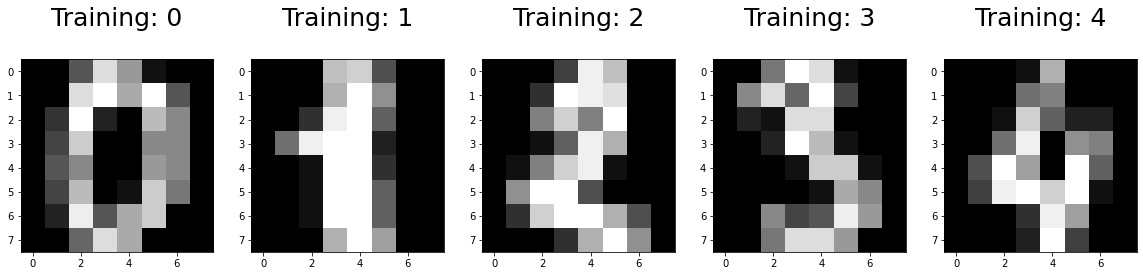

In [12]:
plt.figure(figsize=(20,4))
for index,(image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(8, 8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=25)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=3)

In [15]:
print(x_train.shape)

(1347, 64)


In [16]:
print(y_train.shape)

(1347,)


In [17]:
print(x_test.shape)

(450, 64)


In [18]:
print(y_test.shape)

(450,)


In [19]:
from sklearn.linear_model import LogisticRegression

In [21]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

c:\users\dipendra singh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [22]:
print(logisticRegr.predict(x_test[0].reshape(1, -1)))

[0]


In [23]:
logisticRegr.predict(x_test[0:10])

array([0, 4, 1, 2, 0, 0, 8, 7, 6, 6])

In [24]:
predictions = logisticRegr.predict(x_test)

In [25]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [26]:
import seaborn as sns
from sklearn import metrics

In [27]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[55  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  1  0]
 [ 0  1 45  0  0  0  0  0  0  0]
 [ 0  0  1 46  0  0  0  0  1  0]
 [ 0  3  0  0 49  0  1  1  1  0]
 [ 0  1  0  0  1 36  0  0  0  3]
 [ 0  1  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  0  0  0  0  1  0  0 38  1]
 [ 0  0  0  0  0  1  0  1  1 30]]


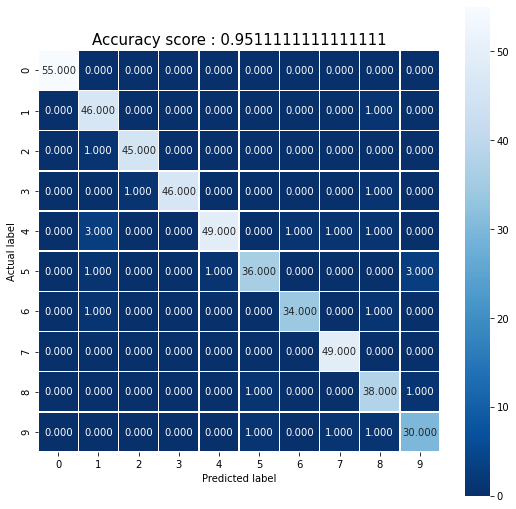

In [29]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot =True, fmt= ".3f", linewidths= .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title ='Accuracy score : {0}'. format(score)
plt.title(all_sample_title, size =15);

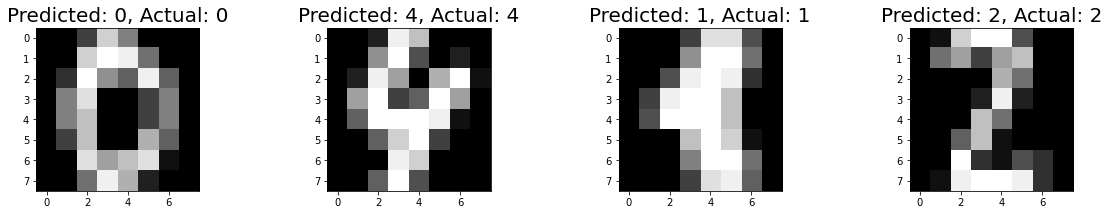

In [36]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20, 3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}". format(predictions[wrong], y_test[wrong]), fontsize=20)